### Import required libraries

In [3]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import scipy.stats as stats

### Setup plotting style

In [ ]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

### Load the data

In [6]:
filename = 'train_38db30da-99d3-490f-bc5b-f83f24c67406_latency_1756124665270_1756124730764.json'

with open(filename, 'r') as file:
    data = json.load(file)

print(f"Data loaded successfully from {filename}")
print(f"Data type: {type(data)}")
print(f"Data keys: {list(data.keys()) if isinstance(data, dict) else 'Not a dictionary'}")

# Convert to DataFrames for easier analysis
telemetry_df = pd.DataFrame(data['telemetryLatencies'])
video_df = pd.DataFrame(data['videoLatencies'])

# Create a summary DataFrame from statistics
protocols = ['websocket', 'webtransport', 'mqtt', 'videoframe']
stats_data = []
for protocol in protocols:
    stats_data.append({
        'protocol': protocol,
        'count': data['statistics'][protocol]['count'],
        'avg': data['statistics'][protocol]['avg'],
        'min': data['statistics'][protocol]['min'],
        'max': data['statistics'][protocol]['max']
    })
stats_df = pd.DataFrame(stats_data)

Data loaded successfully from train_38db30da-99d3-490f-bc5b-f83f24c67406_latency_1756124665270_1756124730764.json
Data type: <class 'dict'>
Data keys: ['exportTime', 'statistics', 'telemetryLatencies', 'videoLatencies']


#### 1.1 Basic Statistics Comparison

In [7]:
print("Protocol Statistics Comparison:")
print(stats_df)

Protocol Statistics Comparison:
       protocol  count        avg    min     max
0     websocket     66  73.117424  21.35  117.35
1  webtransport     65  63.160000  16.35  114.35
2          mqtt     66  13.071970  11.35   16.35
3    videoframe   1931  23.845728  14.35  301.35


#### 1.2 Visualization of protocol performance

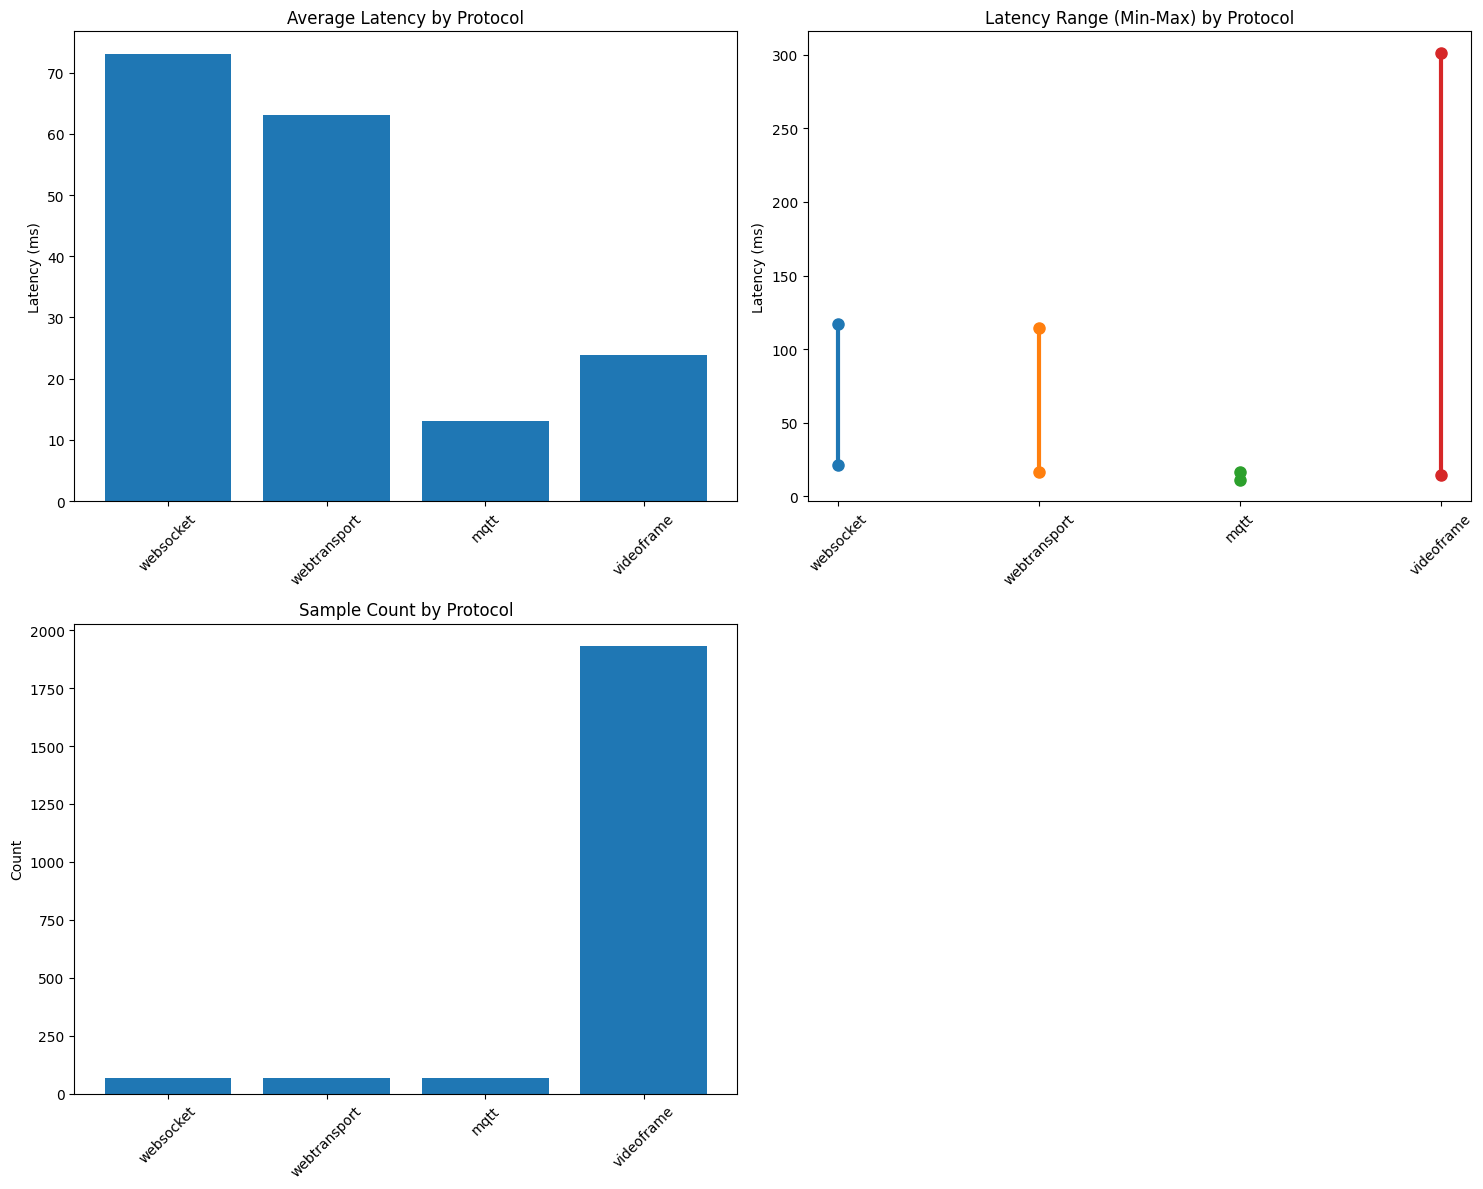

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Average latency by protocol
axes[0, 0].bar(stats_df['protocol'], stats_df['avg'])
axes[0, 0].set_title('Average Latency by Protocol')
axes[0, 0].set_ylabel('Latency (ms)')
axes[0, 0].tick_params(axis='x', rotation=45)

# Min-Max latency range
for i, row in stats_df.iterrows():
    axes[0, 1].plot([row['protocol'], row['protocol']], [row['min'], row['max']], 
                   marker='o', linewidth=3, markersize=8)
axes[0, 1].set_title('Latency Range (Min-Max) by Protocol')
axes[0, 1].set_ylabel('Latency (ms)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Sample count by protocol
axes[1, 0].bar(stats_df['protocol'], stats_df['count'])
axes[1, 0].set_title('Sample Count by Protocol')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# Remove empty subplot
fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()